In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Imports & setup

In [3]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import palettable
import seaborn as sns
%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data' / '05-clean'

plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

In [4]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import sklearn

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [6]:
df_files = pd.read_csv("/content/Weather.csv")

daymapper = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu', 4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
weekdaymapper = {0.0: 'Weekday', 1.0: 'Weekday', 2.0: 'Weekday', 3.0: 'Weekday', 4.0: 'Weekday',
                 5.0: 'Weekend', 6.0: 'Weekend'}
df_files['dayofweek'] = df_files['Day_Of_Week'].map(daymapper)
df_files['daytype'] = df_files['Day_Of_Week'].map(weekdaymapper)
df_files['Date'] = df_files['Date'].str.replace(' 00:00:00', '')

In [7]:
df_files.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
0,2010-01-01,00:00:00,2010,1,1,53,1,4,1,0,76.0,26.0,25.0,99.26,-18.0,-12.7,-9.3,Fri,Weekday
1,2010-01-01,01:00:00,2010,1,1,53,1,4,1,1,76.0,26.0,25.0,99.26,-18.0,-12.8,-9.3,Fri,Weekday
2,2010-01-01,02:00:00,2010,1,1,53,1,4,1,2,74.0,26.0,25.0,99.29,-18.0,-13.4,-9.6,Fri,Weekday
3,2010-01-01,03:00:00,2010,1,1,53,1,4,1,3,72.0,22.0,25.0,99.35,-18.0,-13.9,-9.8,Fri,Weekday
4,2010-01-01,04:00:00,2010,1,1,53,1,4,1,4,74.0,32.0,24.1,99.42,-19.0,-13.5,-9.7,Fri,Weekday


In [8]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
96427,2020-12-31,19:00:00,2020,4,12,53,365,3,0,19,94.0,9.0,16.1,99.21,-11.702041,0.8,1.6,Thu,Weekday
96428,2020-12-31,20:00:00,2020,4,12,53,365,3,0,20,95.0,9.0,11.3,99.21,-11.702041,0.4,1.1,Thu,Weekday
96429,2020-12-31,21:00:00,2020,4,12,53,365,3,0,21,97.0,7.0,9.7,99.20,-11.702041,0.6,1.0,Thu,Weekday
96430,2020-12-31,22:00:00,2020,4,12,53,365,3,0,22,97.0,7.0,9.7,99.20,-11.702041,0.5,0.9,Thu,Weekday
96431,2020-12-31,23:00:00,2020,4,12,53,365,3,0,23,96.0,7.0,8.0,99.19,-11.702041,0.1,0.6,Thu,Weekday


In [9]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               96432 non-null  object 
 1   Time               96432 non-null  object 
 2   Year               96432 non-null  int64  
 3   Quarter            96432 non-null  int64  
 4   Month              96432 non-null  int64  
 5   Week_Of_Year       96432 non-null  int64  
 6   Day_of_Year        96432 non-null  int64  
 7   Day_Of_Week        96432 non-null  int64  
 8   Stat_Hol           96432 non-null  int64  
 9   Hour_of_Day        96432 non-null  int64  
 10  Relative Humidity  96432 non-null  float64
 11  Wind Speed         96432 non-null  float64
 12  Visibility         96432 non-null  float64
 13  Pressure           96432 non-null  float64
 14  Wind_Chill         96432 non-null  float64
 15  Dewpoint Temp      96432 non-null  float64
 16  Temperature        964

In [10]:
for col in df_files.columns:
    print(col)

Date
Time
Year
Quarter
Month
Week_Of_Year
Day_of_Year
Day_Of_Week
Stat_Hol
Hour_of_Day
Relative Humidity
Wind Speed
Visibility
Pressure
Wind_Chill
Dewpoint Temp
Temperature
dayofweek
daytype


In [11]:
df_files['Year'].value_counts()

2011    8784
2015    8784
2019    8784
2010    8760
2012    8760
2013    8760
2014    8760
2016    8760
2017    8760
2018    8760
2020    8760
Name: Year, dtype: int64

### Data for Every Hour in 2010-2019

In [12]:
pd.set_option('display.max_columns', 100)


# Convert the 'Date' column to datetime type
df_files['Date'] = pd.to_datetime(df_files['Date'], dayfirst=True, errors='coerce')

# Find the index of the row with the invalid date
invalid_date_index = df_files[df_files['Date'].isnull()].index

# Remove the row with the invalid date
df_files = df_files.drop(invalid_date_index)

# Filter rows based on the year range
df_filtered = df_files[df_files['Date'].dt.year.between(2010, 2019)]
df_filtered.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
0,2010-01-01,00:00:00,2010,1,1,53,1,4,1,0,76.0,26.0,25.0,99.26,-18.0,-12.7,-9.3,Fri,Weekday
1,2010-01-01,01:00:00,2010,1,1,53,1,4,1,1,76.0,26.0,25.0,99.26,-18.0,-12.8,-9.3,Fri,Weekday
2,2010-01-01,02:00:00,2010,1,1,53,1,4,1,2,74.0,26.0,25.0,99.29,-18.0,-13.4,-9.6,Fri,Weekday
3,2010-01-01,03:00:00,2010,1,1,53,1,4,1,3,72.0,22.0,25.0,99.35,-18.0,-13.9,-9.8,Fri,Weekday
4,2010-01-01,04:00:00,2010,1,1,53,1,4,1,4,74.0,32.0,24.1,99.42,-19.0,-13.5,-9.7,Fri,Weekday


In [13]:
df_filtered.describe()

,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature
count,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000,87600.000000
mean,2014.500000,2.509589,6.526027,26.566027,183.251507,2.999452,0.027671,11.500000,69.358881,16.059092,20.193524,99.536801,-11.697164,3.260521,9.036228
std,2.872298,1.116773,3.447871,15.061136,105.437916,2.000148,0.164030,6.922226,16.094759,10.031338,6.835965,0.767981,2.863748,10.196431,10.953737
min,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,95.910000,-38.000000,-32.000000,-24.600000
25%,2012.000000,2.000000,4.000000,14.000000,92.000000,1.000000,0.000000,5.750000,58.000000,9.000000,16.100000,99.080000,-11.702041,-4.500000,0.600000
50%,2014.500000,3.000000,7.000000,27.000000,183.000000,3.000000,0.000000,11.500000,71.000000,15.000000,24.100000,99.560000,-11.702041,3.500000,9.100000
75%,2017.000000,4.000000,10.000000,40.000000,275.000000,5.000000,0.000000,17.250000,82.000000,22.000000,24.100000,100.030000,-11.702041,11.800000,18.100000
max,2019.000000,4.000000,12.000000,53.000000,366.000000,6.000000,1.000000,23.000000,100.000000,76.000000,40.200000,102.240000,-1.000000,26.200000,37.200000


In [14]:
df_filtered.columns

Index(['Date', 'Time', 'Year', 'Quarter', 'Month', 'Week_Of_Year',
       'Day_of_Year', 'Day_Of_Week', 'Stat_Hol', 'Hour_of_Day',
       'Relative Humidity', 'Wind Speed', 'Visibility', 'Pressure',
       'Wind_Chill', 'Dewpoint Temp', 'Temperature', 'dayofweek', 'daytype'],
      dtype='object')

In [15]:
features_train=df_filtered[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
features_train
scaler=StandardScaler()
Train=scaler.fit_transform(np.array(features_train))
Train

array([[-1.56531362,  0.41262852,  0.99099088, ..., -2.20091749,
         5.92778322, -1.67397963],
       [-1.57512103,  0.41262852,  0.99099088, ..., -2.20091749,
         5.92778322, -1.67397963],
       [-1.63396549,  0.28836375,  0.99099088, ..., -2.20091749,
         5.92778322, -1.7013677 ],
       ...,
       [-2.16356561, -0.45722481,  0.39286186, ..., -3.5976966 ,
        -0.16869713, -2.01176581],
       [-2.16356561, -0.39509243,  0.5922382 , ..., -3.5976966 ,
        -0.16869713, -2.03002452],
       [-2.10472115, -0.27082767,  0.79161454, ..., -3.94689137,
        -0.16869713, -2.02089517]])

In [16]:
cmatrix = features_train.corr()
round(cmatrix, ndigits=5)

,Dewpoint Temp,Relative Humidity,Wind Speed,Visibility,Pressure,Hour_of_Day,Month,Day_Of_Week,Day_of_Year,Week_Of_Year,Quarter,Wind_Chill,Stat_Hol,Temperature
Dewpoint Temp,1.00000,0.13485,-0.19327,-0.12930,-0.24242,0.01532,0.31969,-0.01414,0.31631,0.31634,0.32643,0.20617,0.00207,0.93435
Relative Humidity,0.13485,1.00000,-0.20202,-0.54829,-0.27405,-0.25127,0.11573,-0.00828,0.11648,0.11987,0.11419,0.06266,0.01407,-0.22094
Wind Speed,-0.19327,-0.20202,1.00000,0.11452,-0.28424,0.13566,-0.06213,0.01027,-0.06432,-0.06995,-0.06248,-0.16382,0.00374,-0.12067
Visibility,-0.12930,-0.54829,0.11452,1.00000,0.25786,0.04622,0.02171,-0.00908,0.02277,0.01937,0.02149,-0.05796,0.00894,0.04850
Pressure,-0.24242,-0.27405,-0.28424,0.25786,1.00000,-0.00692,0.02043,0.01731,0.02229,0.02883,0.01560,-0.05023,0.00796,-0.14695
Hour_of_Day,0.01532,-0.25127,0.13566,0.04622,-0.00692,1.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.01289,0.00000,0.10441
Month,0.31969,0.11573,-0.06213,0.02171,0.02043,-0.00000,1.00000,0.00231,0.99650,0.96926,0.97136,0.10229,0.05274,0.27191
Day_Of_Week,-0.01414,-0.00828,0.01027,-0.00908,0.01731,-0.00000,0.00231,1.00000,0.00222,0.00316,0.00135,0.01269,-0.11853,-0.00980
Day_of_Year,0.31631,0.11648,-0.06432,0.02277,0.02229,-0.00000,0.99650,0.00222,1.00000,0.97061,0.96820,0.09945,0.04717,0.26830
Week_Of_Year,0.31634,0.11987,-0.06995,0.01937,0.02883,-0.00000,0.96926,0.00316,0.97061,1.00000,0.94529,0.09459,0.07295,0.26736


In [17]:
df_files.tail()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
96427,2020-12-31,19:00:00,2020,4,12,53,365,3,0,19,94.0,9.0,16.1,99.21,-11.702041,0.8,1.6,Thu,Weekday
96428,2020-12-31,20:00:00,2020,4,12,53,365,3,0,20,95.0,9.0,11.3,99.21,-11.702041,0.4,1.1,Thu,Weekday
96429,2020-12-31,21:00:00,2020,4,12,53,365,3,0,21,97.0,7.0,9.7,99.20,-11.702041,0.6,1.0,Thu,Weekday
96430,2020-12-31,22:00:00,2020,4,12,53,365,3,0,22,97.0,7.0,9.7,99.20,-11.702041,0.5,0.9,Thu,Weekday
96431,2020-12-31,23:00:00,2020,4,12,53,365,3,0,23,96.0,7.0,8.0,99.19,-11.702041,0.1,0.6,Thu,Weekday


In [18]:
pd.set_option('display.max_columns', 100)

dftest = df_files[df_files['Date'].dt.year == 2020]
dftest.head()

,Date,Time,Year,Quarter,Month,Week_Of_Year,Day_of_Year,Day_Of_Week,Stat_Hol,Hour_of_Day,Relative Humidity,Wind Speed,Visibility,Pressure,Wind_Chill,Dewpoint Temp,Temperature,dayofweek,daytype
87672,2020-01-01,00:00:00,2020,1,1,1,1,3,1,0,64.0,9.0,24.1,100.47,-19.0,-18.9,-13.6,Thu,Weekday
87673,2020-01-01,01:00:00,2020,1,1,1,1,3,1,1,62.0,9.0,24.1,100.49,-19.0,-19.0,-13.3,Thu,Weekday
87674,2020-01-01,02:00:00,2020,1,1,1,1,3,1,2,64.0,7.0,24.1,100.55,-18.0,-18.5,-13.1,Thu,Weekday
87675,2020-01-01,03:00:00,2020,1,1,1,1,3,1,3,69.0,4.0,24.1,100.58,-16.0,-17.9,-13.5,Thu,Weekday
87676,2020-01-01,04:00:00,2020,1,1,1,1,3,1,4,71.0,6.0,24.1,100.59,-18.0,-17.8,-13.6,Thu,Weekday


In [19]:
features_test = dftest[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
Test = scaler.fit_transform(np.array(features_test))
Test

array([[-2.04159275, -0.30011886, -0.6950164 , ..., -2.43803067,
         5.95818764, -2.08961036],
       [-2.05115846, -0.41900738, -0.6950164 , ..., -2.43803067,
         5.95818764, -2.060893  ],
       [-2.0033299 , -0.30011886, -0.89527768, ..., -2.09525134,
         5.95818764, -2.04174808],
       ...,
       [-0.17627883,  1.66154169, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.69203176],
       [-0.18584454,  1.66154169, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.70160422],
       [-0.22410739,  1.60209743, -0.89527768, ...,  0.06355888,
        -0.16783627, -0.73032158]])

In [20]:
print(Train.shape)
print(Train[2:].shape)
x_train = np.array([[Train[i-2], Train[i-1], Train[i]] for i in range(2, len(Train)-24)])
x_test = np.array([[Test[i-2], Test[i-1], Test[i]] for i in range(2, len(Test)-24)])[:500]
print(f'x_train.shape: {x_train.shape} x_test.shape: {x_test.shape}')
y_train = np.array([[Train[i+j+1,-1] for j in range(0, 24)] for i in range(2, len(Train)-24)])
y_test = np.array([[Test[i+j+1,-1] for j in range(0, 24)] for i in range(2, len(Test)-24)])[:500]
print(f'y_train.shape: {y_train.shape} y_test.shape: {y_test.shape}')

(87600, 14)
(87598, 14)
x_train.shape: (87574, 3, 14) x_test.shape: (500, 3, 14)
y_train.shape: (87574, 24) y_test.shape: (500, 24)


#Transformer Model Algorithm

In [21]:
from random import choice
from random import uniform
from numpy.random import randint
import random

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)
print(f'x_train.shape: {x_train.shape} x_val.shape: {x_val.shape}')
print(f'y_train.shape: {y_train.shape} y_val.shape: {y_val.shape}')

x_train.shape: (65680, 3, 14) x_val.shape: (21894, 3, 14)
y_train.shape: (65680, 24) y_val.shape: (21894, 24)


In [24]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def Transformer_model(param):
    batch_sz, ep, lr = param

    model = models.Sequential()

    # Defining the input layer
    model.add(layers.Dense(units=36, input_shape=(3, 14), kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-5), bias_regularizer=tf.keras.regularizers.L2(1e-5), activity_regularizer=tf.keras.regularizers.L2(1e-5)))

    # Adding the Transformer layer
    model.add(layers.TimeDistributed(layers.Dense(64)))

    attn_output = layers.MultiHeadAttention(
        num_heads=8,
        key_dim=64,
        dropout=0.1,
    )(model.output, model.output)
    attn_output = layers.LayerNormalization(epsilon=1e-6)(attn_output)
    merged_output = layers.Concatenate()([model.output, attn_output])

    # Flattening the output
    flattened_output = layers.Flatten()(merged_output)

    # Adding the dense layers
    dense_output = layers.Dense(64, activation='relu')(flattened_output)
    dense_output = layers.Dense(64, activation='relu')(dense_output)

    # Defining the output layer of the model
    output = layers.Dense(24, kernel_initializer='normal', activation='linear')(dense_output)

    model = models.Model(inputs=model.inputs, outputs=output)

    # Defining the optimizer
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

    # Early stopping
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5, min_delta=0.0001)]

    # Fitting the model to the training set
    model.fit(x_train, y_train, batch_size=batch_sz, epochs=ep, validation_data=(x_val, y_val), callbacks=callbacks, verbose=0)

    return model



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [26]:
# Hyperparameter Lists
batch_size_list = [8,12,20,24]
epoch_list = [1000]
learning_rate_list = [0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]

In [27]:
# Step 1: Initialize the Population
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        batch_size = np.random.choice(batch_size_list)
        num_epochs = np.random.choice(epoch_list)
        learning_rate = np.random.choice(learning_rate_list)
        population.append((batch_size, num_epochs, learning_rate))
    return population

In [28]:
# Fitness evaluation metric: Classification Accuracy
from keras.losses import mean_squared_error as MSE
from keras.losses import MeanAbsoluteError
def fitness_evaluation(model):
  #mean_absolute_percentage_error = tf.keras.losses.MeanAbsolutePercentageError()
  #metrics = kl(y_test, model.predict(x_test)).numpy()
  #metrics = mean_absolute_percentage_error(y_test, model.predict(x_test)).numpy()
  MSE = tf.keras.losses.MeanSquaredError()
  metrics = MSE(y_test, model.predict(x_test)).numpy().mean()
  print(f"metrics:{metrics}")
  return metrics

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
def findMAPE(model):
  y_pred = model.predict(x_train)
  metrics = mean_absolute_percentage_error(y_train, y_pred)
  # metrics = mean_absolute_percentage_error(y_test, model.predict(x_test)).numpy()
  return metrics

In [31]:
# Step 3: Implement Differential Evolution Algorithm
def differential_evolution(population, max_generations, mutation_factor, crossover_prob):
    population_size = len(population)

    for generation in range(max_generations):
        for i in range(population_size):
            target_vector = population[i]

            # Step 3a: Mutation
            a, b, c = np.random.choice(population_size, 3, replace=False)

            mutant_vector = []
            if population[a][0] + mutation_factor * (population[b][0] - population[c][0]) < 8:
                mutant_vector.append(8)
            elif population[a][0] + mutation_factor * (population[b][0] - population[c][0]) > 24:
                mutant_vector.append(24)
            else:
                mutant_vector.append(population[a][0] + mutation_factor * (population[b][0] - population[c][0]))

            if population[a][1] + mutation_factor * (population[b][1] - population[c][1]) < 1000:
                mutant_vector.append(1000)
            elif population[a][1] + mutation_factor * (population[b][1] - population[c][1]) > 1000:
                mutant_vector.append(1000)
            else:
                mutant_vector.append(population[a][1] + mutation_factor * (population[b][1] - population[c][1]))

            if population[a][2] + mutation_factor * (population[b][2] - population[c][2]) < 0.0001:
                mutant_vector.append(0.0001)
            elif population[a][2] + mutation_factor * (population[b][2] - population[c][2]) > 0.5:
                mutant_vector.append(0.5)
            else:
                mutant_vector.append(population[a][2] + mutation_factor * (population[b][2] - population[c][2]))

            mutant_vector = tuple(mutant_vector)

            # Step 3b: Crossover
            trial_vector = []
            for j in range(len(target_vector)):
                if np.random.rand() <= crossover_prob:
                    trial_vector.append(mutant_vector[j])
                else:
                    trial_vector.append(target_vector[j])

            trial_vector[0] = np.int64(trial_vector[0])
            trial_vector[1] = np.int64(trial_vector[1])
            trial_vector[2] = np.float64(trial_vector[2])
            trial_vector = tuple(trial_vector)

            #Step 3c: Selection
            target_model = Transformer_model(target_vector)
            train_model = Transformer_model(trial_vector)
            target_fitness = fitness_evaluation(target_model)
            trial_fitness = fitness_evaluation(train_model)

            mape = 0
            if trial_fitness < target_fitness:
                population[i] = trial_vector
                mape = findMAPE(train_model)
            else:
                mape = findMAPE(target_model)

            mse = min(trial_fitness, target_fitness)

            print(generation+1, 'Parameters:','batch_size:', population[i][0], 'epochs:', population[i][1],"lr:", population[i][2], 'MSE:', mse, 'MAPE:', mape)

    best_solution = min(population, key=fitness_evaluation)
    return best_solution

In [34]:
# Step 5: Run Differential Evolution
population_size = 10
max_generations = 20
mutation_factor = 0.8
crossover_prob = 0.9

In [35]:
# Initialize the population
population = initialize_population(population_size)
print(population)

[(20, 1000, 0.0001), (12, 1000, 0.01), (24, 1000, 0.005), (20, 1000, 0.05), (24, 1000, 0.1), (24, 1000, 0.005), (8, 1000, 0.001), (24, 1000, 0.01), (20, 1000, 0.001), (12, 1000, 0.0001)]


In [36]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [37]:
# Run Differential Evolution
best_hyperparameters = differential_evolution(population, max_generations, mutation_factor, crossover_prob)

16/16 [==============================] - 1s 9ms/step
metrics:0.13580283522605896
16/16 [==============================] - 1s 15ms/step
metrics:0.1358662098646164
2053/2053 [==============================] - 24s 12ms/step
1 Parameters: batch_size: 20 epochs: 1000 lr: 0.0001 MSE: 0.13580284 MAPE: 0.8740449495273789
16/16 [==============================] - 0s 8ms/step
metrics:0.12826214730739594
16/16 [==============================] - 0s 8ms/step
metrics:0.125946044921875
2053/2053 [==============================] - 17s 8ms/step
1 Parameters: batch_size: 24 epochs: 1000 lr: 0.012200000000000003 MSE: 0.12594604 MAPE: 0.897709642564962
16/16 [==============================] - 0s 3ms/step
metrics:0.13060052692890167
16/16 [==============================] - 0s 3ms/step
metrics:0.13127712905406952
2053/2053 [==============================] - 8s 4ms/step
1 Parameters: batch_size: 24 epochs: 1000 lr: 0.005 MSE: 0.13060053 MAPE: 0.8461219023181722
16/16 [==============================] - 0s 3ms/

KeyboardInterrupt: ignored

In [38]:
# param = best_hyperparameters
param = [10, 1000, 0.05072] # try least mse hyper-parameters if it doesnt complete the DE generations due to computational inefficiency
model = Transformer_model(param)
print(model)

In [39]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [40]:
y_test[:, 1].shape

(500,)

16/16 [==============================] - 0s 5ms/step


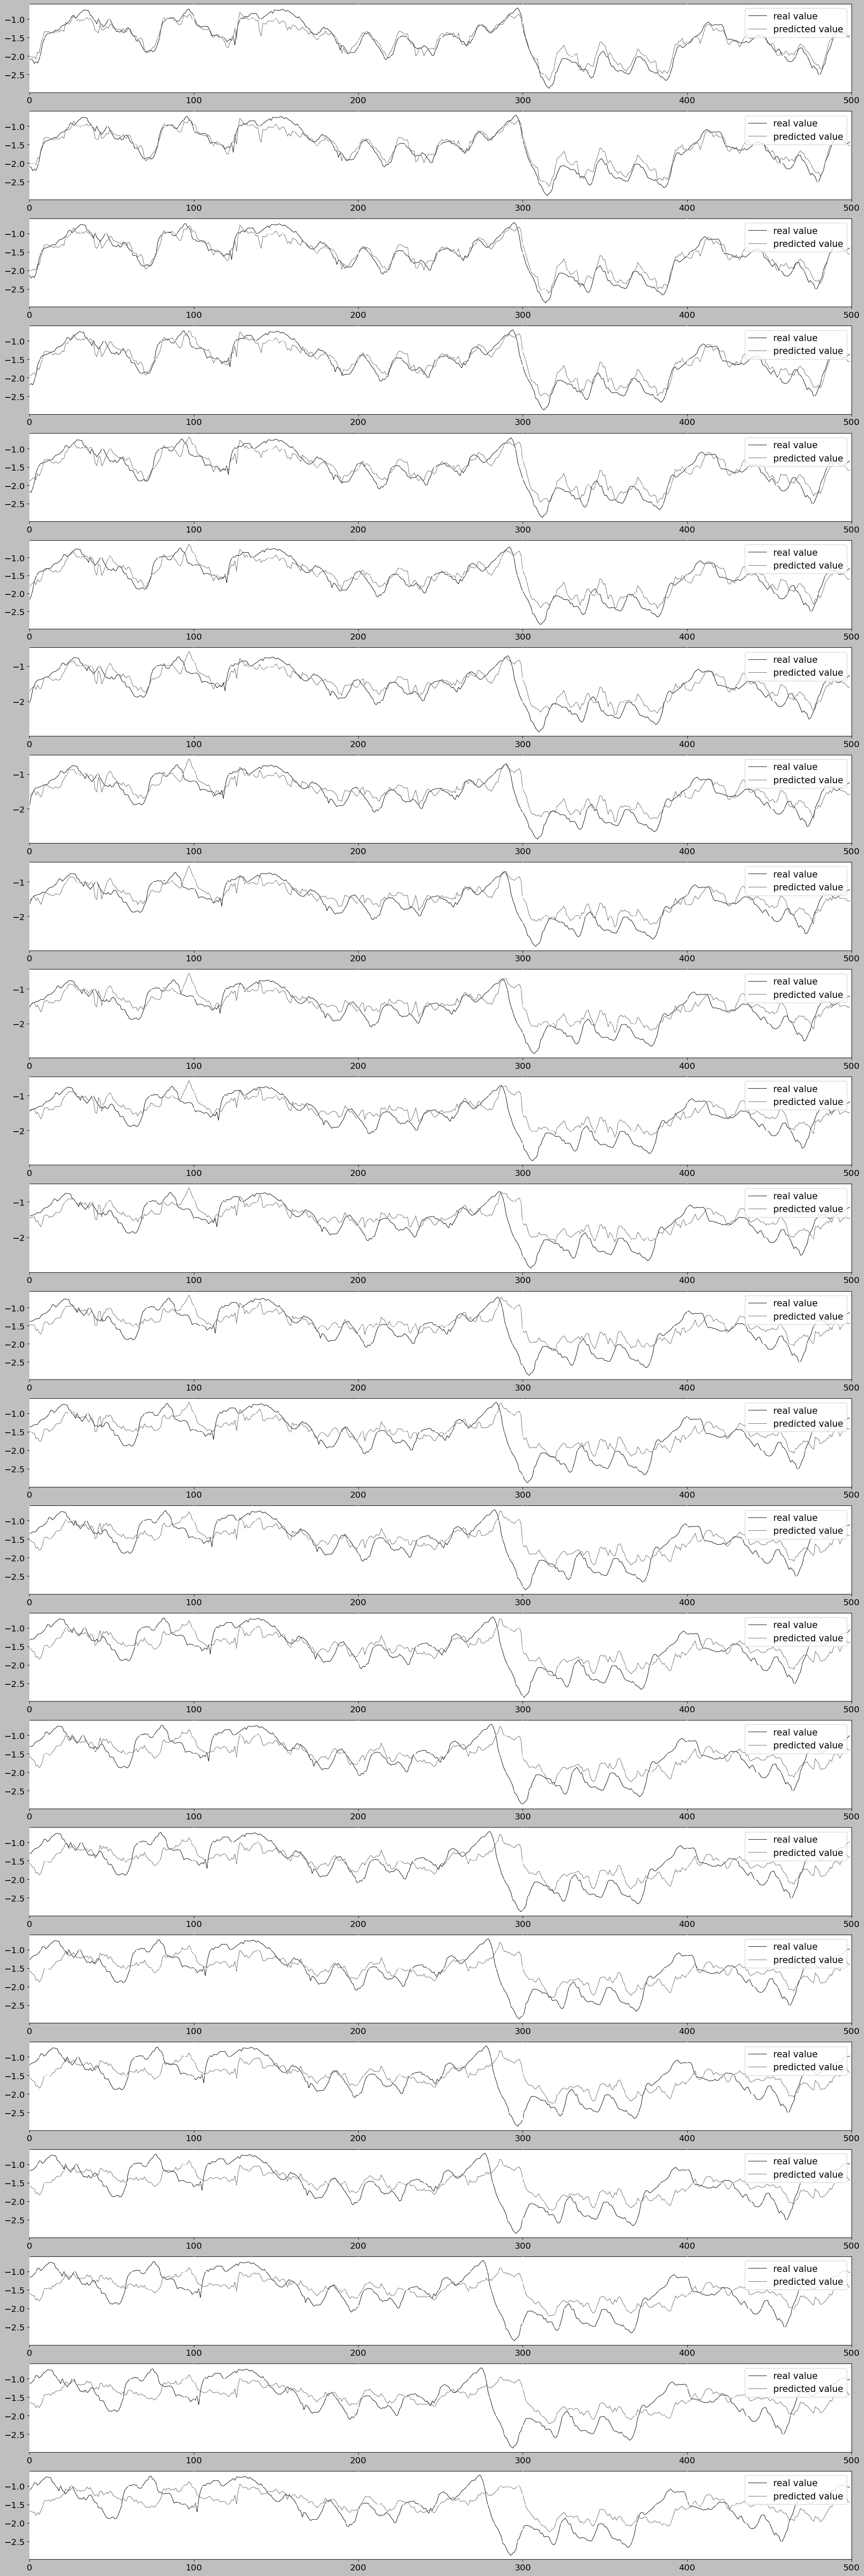

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(24, 1, figsize=(20, 60))  # Create a figure with 12 subplots
y_predict = model.predict(x_test)
y_predict_array = np.array(y_predict)
# y_predict_array = y_predict_array.reshape(len(y_test), 12)
for i in range(24):
    y_test1 = y_test[:, i]
    y_pre = y_predict_array[:, i]
    # print(y_test1.shape, y_pre.shape)
    draw = pd.concat([pd.DataFrame(y_test[:500, i]), pd.DataFrame(y_pre)], axis=1)
    draw.iloc[:, 0].plot(ax=axs[i])  # Plot y_test value in the corresponding subplot
    draw.iloc[:, 1].plot(ax=axs[i])  # Plot predicted value in the corresponding subplot
    axs[i].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    # axs[i].title(f"Test Data vs Predicted after {i+1} hours", fontsize='20')
    axs[i].set_xlim(0, len(y_test1[:]))  # Set the x-axis limits for each subplot

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

# PREDICTION FOR WHOLE YEAR

In [45]:
pd.set_option('display.max_columns', 100)
dfpredict_data = df_files.loc['2020':, :].copy(deep=True)
predict_data = dfpredict_data[['Dewpoint Temp', 'Relative Humidity','Wind Speed', 'Visibility', 'Pressure','Hour_of_Day','Month','Day_Of_Week', 'Day_of_Year', 'Week_Of_Year','Quarter','Wind_Chill','Stat_Hol','Temperature']]
predict_data

,Dewpoint Temp,Relative Humidity,Wind Speed,Visibility,Pressure,Hour_of_Day,Month,Day_Of_Week,Day_of_Year,Week_Of_Year,Quarter,Wind_Chill,Stat_Hol,Temperature
20200,9.4,93.0,11.0,1.6,99.57,16,4,5,111,16,2,-11.702041,0,10.5
20201,10.8,93.0,17.0,2.8,99.55,17,4,5,111,16,2,-11.702041,0,11.9
20202,11.1,89.0,13.0,6.4,99.53,18,4,5,111,16,2,-11.702041,0,12.9
20203,10.5,89.0,9.0,6.4,99.46,19,4,5,111,16,2,-11.702041,0,12.2
20204,10.3,89.0,9.0,6.4,99.48,20,4,5,111,16,2,-11.702041,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,0.8,94.0,9.0,16.1,99.21,19,12,3,365,53,4,-11.702041,0,1.6
96428,0.4,95.0,9.0,11.3,99.21,20,12,3,365,53,4,-11.702041,0,1.1
96429,0.6,97.0,7.0,9.7,99.20,21,12,3,365,53,4,-11.702041,0,1.0
96430,0.5,97.0,7.0,9.7,99.20,22,12,3,365,53,4,-11.702041,0,0.9


In [47]:
scaler=StandardScaler()
predict=scaler.fit_transform(np.array(predict_data))
predict

array([[ 0.57526416,  1.44810254, -0.5023448 , ...,  0.0065359 ,
        -0.16885733,  0.11114914],
       [ 0.71266355,  1.44810254,  0.09480115, ...,  0.0065359 ,
        -0.16885733,  0.23964592],
       [ 0.74210628,  1.20128089, -0.30329615, ...,  0.0065359 ,
        -0.16885733,  0.33142933],
       ...,
       [-0.28838914,  1.69492419, -0.90044209, ...,  0.0065359 ,
        -0.16885733, -0.76079327],
       [-0.29820338,  1.69492419, -0.90044209, ...,  0.0065359 ,
        -0.16885733, -0.76997162],
       [-0.33746035,  1.63321878, -0.90044209, ...,  0.0065359 ,
        -0.16885733, -0.79750664]])

In [48]:
xp = np.array([[predict[i-2,:], predict[i-1,:], predict[i,:]] for i in range(2, len(predict)-24)])
print(f'xp.shape: {xp.shape}')
yp = np.array([np.stack([predict[i+j+1,-1] for j in range(0, 24)]) for i in range(2, len(predict)-24)])
print(f'yp.shape: {yp.shape}')

xp.shape: (76158, 3, 14)
yp.shape: (76158, 24)


In [49]:
xp.shape
y_prediction = model.predict(xp)
y_prediction_array = np.array(y_prediction)

2380/2380 [==============================] - 10s 4ms/step


In [50]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(yp, y_prediction)
print("Mean Absolute Percentage Error (MAPE):", mape)
print(yp.shape)
print(y_prediction.shape)
mape_values = []
for actual, predicted in zip(yp, y_prediction):
    mape_values.append(mean_absolute_percentage_error([actual], [predicted]))

worst_mape = np.max(mape_values)
best_mape = np.min(mape_values)

print("Worst MAPE:", worst_mape)
print("Best MAPE:", best_mape)


Mean Absolute Percentage Error (MAPE): 1.3021074196230933
(76158, 24)
(76158, 24)
Worst MAPE: 79.57385287743942
Best MAPE: 0.01859139434031539


##VISUALISATION

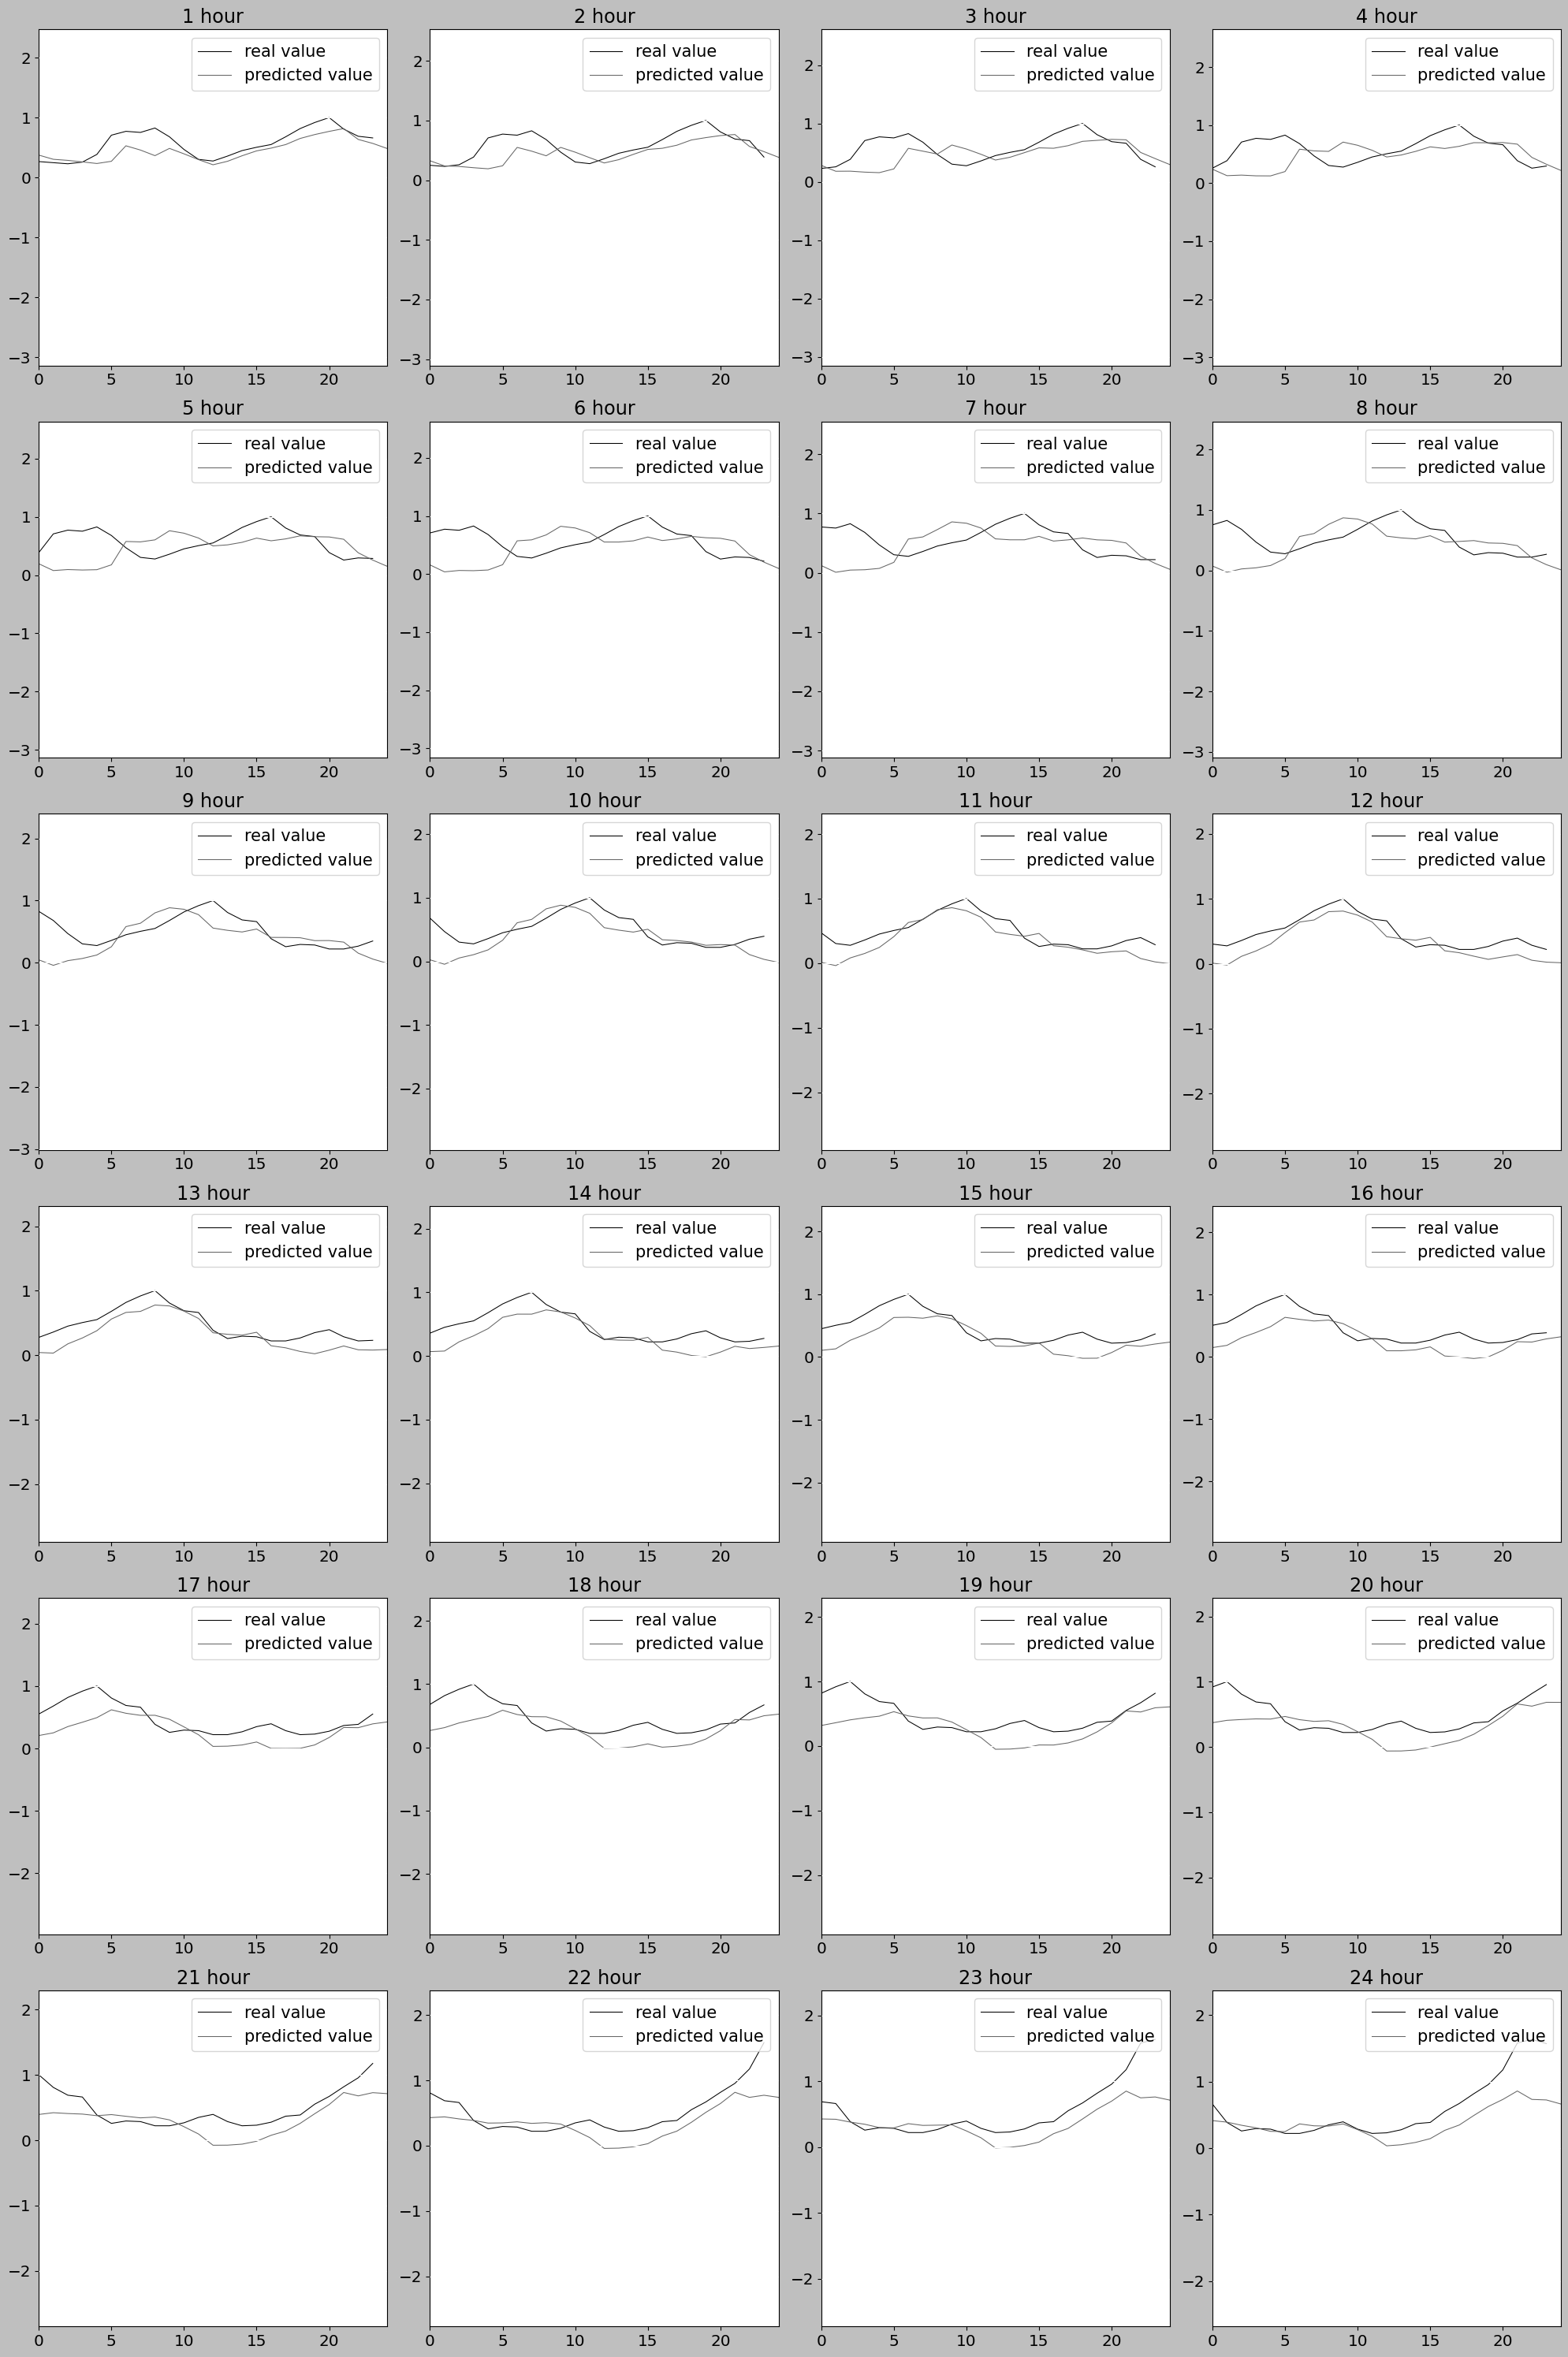

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(20, 30))  # Create a figure with 6 rows and 4 columns of subplots


for i in range(24):
    row = i // 4  # Calculate the row index for the subplot
    col = i % 4  # Calculate the column index for the subplot

    y_prede = y_prediction_array[:, i]
    draw = pd.concat([pd.DataFrame(yp[:24, i]), pd.DataFrame(y_prede)], axis=1)

    axs[row, col].plot(draw.iloc[:, 0])  # Plot y_test value in the corresponding subplot
    axs[row, col].plot(draw.iloc[:, 1])  # Plot predicted value in the corresponding subplot
    axs[row, col].legend(('real value', 'predicted value'), loc='upper right', fontsize='15')
    axs[row, col].set_xlim(0, len(yp[:24]))  # Set the x-axis limits for each subplot
    axs[row, col].set_title(f"{i+1} hour")  # Add a title to the subplot indicating the hour

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [60]:
import matplotlib.pyplot as plt
import numpy as np
df_predict_aggregate = pd.DataFrame(columns=['prediction_agg', 'actual'])

def aggregate_plot(y_actual, y_pred):
    y_mean_pred = []
    for j in range(23, -1, -1):
        total_sum = 0
        for i in range(0, 24):
            if j - i >= 0:
                total_sum += y_pred[i][j - i]
        y_mean_pred.append(total_sum / (j + 1))
    y_mean_pred = list(reversed(y_mean_pred))

    df_predict_aggregate['prediction_agg'] = y_mean_pred
    df_predict_aggregate['actual'] = y_actual

    mape = mean_absolute_percentage_error(yp, y_prediction)
    print(mape)

    fig, ax = plt.subplots()
    ax.plot(y_actual, marker='*', color='blue')
    ax.plot(y_mean_pred, marker='+', color='red')
    ax.legend(('Real Value', 'Predicted Value'), loc='upper right', fontsize='15')

    # Increase y-spacing from 0.2 to 0.4 for every tick
    y_ticks = np.arange(min(min(y_actual), min(y_mean_pred)), max(max(y_actual), max(y_mean_pred)), 0.4)
    ax.set_yticks(y_ticks)

    plt.show()

In [ ]:
df_predict_aggregate

1.3021074196230933


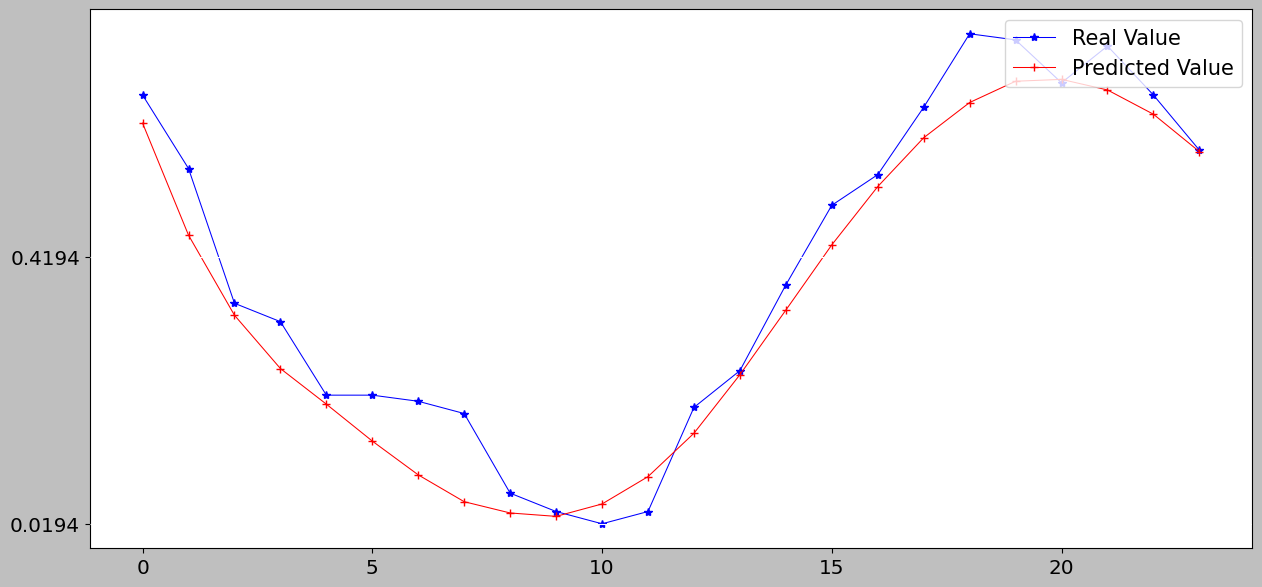

In [62]:
aggregate_plot(yp[312], y_prediction[312:336])